# CH1

In [1]:
#문제 0
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
#문제 1
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   8400 non-null   int64  
 1   patient_id                     8400 non-null   int64  
 2   hospital_id                    8400 non-null   int64  
 3   age                            8008 non-null   float64
 4   bmi                            8070 non-null   float64
 5   elective_surgery               8400 non-null   int64  
 6   ethnicity                      8272 non-null   object 
 7   gender                         8399 non-null   object 
 8   height                         8280 non-null   float64
 9   icu_admit_source               8385 non-null   object 
 10  icu_id                         8400 non-null   int64  
 11  icu_stay_type                  8400 non-null   object 
 12  icu_type                       8400 non-null   o

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   3600 non-null   int64  
 1   patient_id                     3600 non-null   int64  
 2   hospital_id                    3600 non-null   int64  
 3   age                            3441 non-null   float64
 4   bmi                            3476 non-null   float64
 5   elective_surgery               3600 non-null   int64  
 6   ethnicity                      3541 non-null   object 
 7   gender                         3600 non-null   object 
 8   height                         3561 non-null   float64
 9   icu_admit_source               3597 non-null   object 
 10  icu_id                         3600 non-null   int64  
 11  icu_stay_type                  3600 non-null   object 
 12  icu_type                       3600 non-null   o

In [5]:
#문제 2
todrop = []
dropw = ['_id', 'icu_', 'noninvasive_']
for colname in train.columns:
    for w in dropw:
        if w in colname:
            todrop.append(colname)
            
train.drop(columns = todrop, inplace=True)
test.drop(columns = todrop, inplace=True)

train.head()

,age,bmi,elective_surgery,ethnicity,gender,height,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,V84,hospital_death
0,63.0,27.695109,1,Caucasian,M,169.0,79.1,308.0,1207.01,1,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,NaN,0
1,67.0,27.858288,0,Caucasian,F,170.2,80.7,301.0,410.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0
2,67.0,36.390941,0,Caucasian,M,180.3,118.3,110.0,110.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
3,70.0,39.654246,0,Caucasian,F,152.4,92.1,113.0,501.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
4,71.0,31.977196,1,Caucasian,M,187.9,112.9,308.0,1207.01,1,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,NaN,0


In [6]:
#문제 3
train.drop(columns='V84', inplace=True)
test.drop(columns='V84', inplace=True)

train['bmi'] = round(train['bmi'], 1)
train['height'] = round(train['height'], 1)
train['weight'] = round(train['weight'], 1)

test['bmi'] = round(test['bmi'], 1)
test['height'] = round(test['height'], 1)
test['weight'] = round(test['weight'], 1)

train.head()

,age,bmi,elective_surgery,ethnicity,gender,height,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,63.0,27.7,1,Caucasian,M,169.0,79.1,308.0,1207.01,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,0
1,67.0,27.9,0,Caucasian,F,170.2,80.7,301.0,410.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
2,67.0,36.4,0,Caucasian,M,180.3,118.3,110.0,110.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
3,70.0,39.7,0,Caucasian,F,152.4,92.1,113.0,501.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
4,71.0,32.0,1,Caucasian,M,187.9,112.9,308.0,1207.01,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Undefined diagnoses,0


In [7]:
#문제 4
train.nunique()

age                             74
bmi                            454
elective_surgery                 2
ethnicity                        6
gender                           2
                              ... 
lymphoma                         2
solid_tumor_with_metastasis      2
apache_3j_bodysystem            11
apache_2_bodysystem             10
hospital_death                   2
Length: 63, dtype: int64

In [8]:
test.nunique()

age                             74
bmi                            389
elective_surgery                 2
ethnicity                        6
gender                           2
                              ... 
lymphoma                         2
solid_tumor_with_metastasis      2
apache_3j_bodysystem            11
apache_2_bodysystem             10
hospital_death                   2
Length: 63, dtype: int64

In [9]:
#문제 5
train = train.replace("", np.nan)
test = test.replace("", np.nan)
train = train.replace(" ", np.nan)
test = test.replace(" ", np.nan)

train.isnull().sum()

age                            392
bmi                            330
elective_surgery                 0
ethnicity                      128
gender                           1
                              ... 
lymphoma                        63
solid_tumor_with_metastasis     63
apache_3j_bodysystem           159
apache_2_bodysystem            159
hospital_death                   0
Length: 63, dtype: int64

In [10]:
#문제 6
train.drop(columns=['apache_2_diagnosis', 'apache_3j_diagnosis',
                   'ethnicity'], inplace=True)
test.drop(columns=['apache_2_diagnosis', 'apache_3j_diagnosis',
                   'ethnicity'], inplace=True)

In [11]:
train.isnull().sum()

age                              392
bmi                              330
elective_surgery                   0
gender                             1
height                           120
weight                           265
apache_post_operative              0
arf_apache                        63
gcs_eyes_apache                  169
gcs_motor_apache                 169
gcs_unable_apache                 85
gcs_verbal_apache                169
heart_rate_apache                 74
intubated_apache                  63
map_apache                        83
resprate_apache                  111
temp_apache                      388
ventilated_apache                 63
d1_diasbp_max                     13
d1_diasbp_min                     13
d1_heartrate_max                  10
d1_heartrate_min                  10
d1_mbp_max                        16
d1_mbp_min                        16
d1_resprate_max                   33
d1_resprate_min                   33
d1_spo2_max                       32
d

In [12]:
test.isnull().sum()

age                              159
bmi                              124
elective_surgery                   0
gender                             0
height                            39
weight                           103
apache_post_operative              0
arf_apache                        27
gcs_eyes_apache                   77
gcs_motor_apache                  77
gcs_unable_apache                 43
gcs_verbal_apache                 77
heart_rate_apache                 37
intubated_apache                  27
map_apache                        39
resprate_apache                   51
temp_apache                      151
ventilated_apache                 27
d1_diasbp_max                      8
d1_diasbp_min                      8
d1_heartrate_max                   9
d1_heartrate_min                   9
d1_mbp_max                        10
d1_mbp_min                        10
d1_resprate_max                   13
d1_resprate_min                   13
d1_spo2_max                       12
d

In [13]:
na = pd.DataFrame(train.isnull().sum())
na['columns'] = na.index
na.rename(columns = {0:'num_of_NA'}, inplace=True)
na.reset_index(drop=True, inplace=True)

na['total'] = train.count().tolist()
na['na%'] = na['num_of_NA']/na['total'].tolist()
na['na%'] = round(na['na%']*100, 2)
na['na%'] = na['na%'].astype('str')
na['na%'] = na['na%'] + "%"


na = na.sort_values(by='num_of_NA', ascending=False)

na

,num_of_NA,columns,total,na%
47,839,d1_potassium_min,7561,11.1%
46,839,d1_potassium_max,7561,11.1%
48,736,apache_4a_hospital_death_prob,7664,9.6%
45,493,d1_glucose_min,7907,6.23%
44,493,d1_glucose_max,7907,6.23%
36,401,h1_mbp_max,7999,5.01%
37,401,h1_mbp_min,7999,5.01%
39,400,h1_resprate_min,8000,5.0%
38,400,h1_resprate_max,8000,5.0%
0,392,age,8008,4.9%


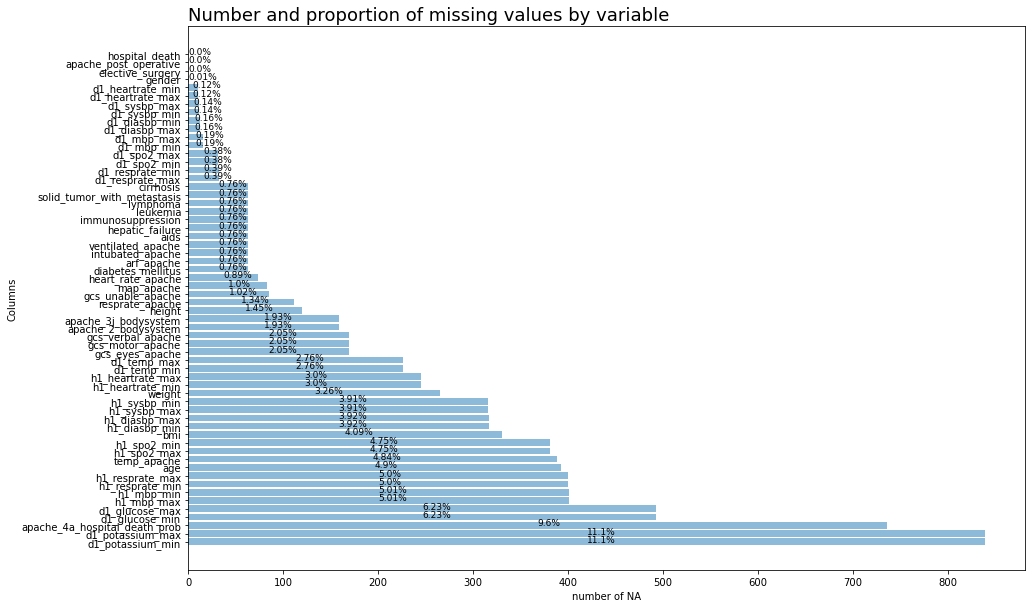

In [14]:
plt.figure(figsize=(15,10))
plt.barh(na['columns'], na['num_of_NA'], alpha=0.5)
plt.xlabel('number of NA')
plt.ylabel('Columns')
plt.title('Number and proportion of missing values by variable',
         fontsize=18, loc='left')

for i, v in enumerate(na['columns']):
    plt.text(na['num_of_NA'][i]/2, na['columns'][i], na['na%'][i],
             fontsize = 9, 
             color='black')

#파이썬에는 그라데이션 바로 적용하는 함수가 없어서 직접 구현해야함..

In [15]:
train.drop(columns = ['d1_potassium_min', 'd1_potassium_max'],
           inplace=True)
test.drop(columns = ['d1_potassium_min', 'd1_potassium_max'],
          inplace=True)

'\nintubated_apache, afr_apache, ventilated_apache, aids, cirrhosis,\ndiabetes_mellitus, hepatic_failure, immunosuppression, leukemia,\nlymphoma, solid_tumor_with_metastasis가 비슷한 결측치 발생 경향을 보인다\n'

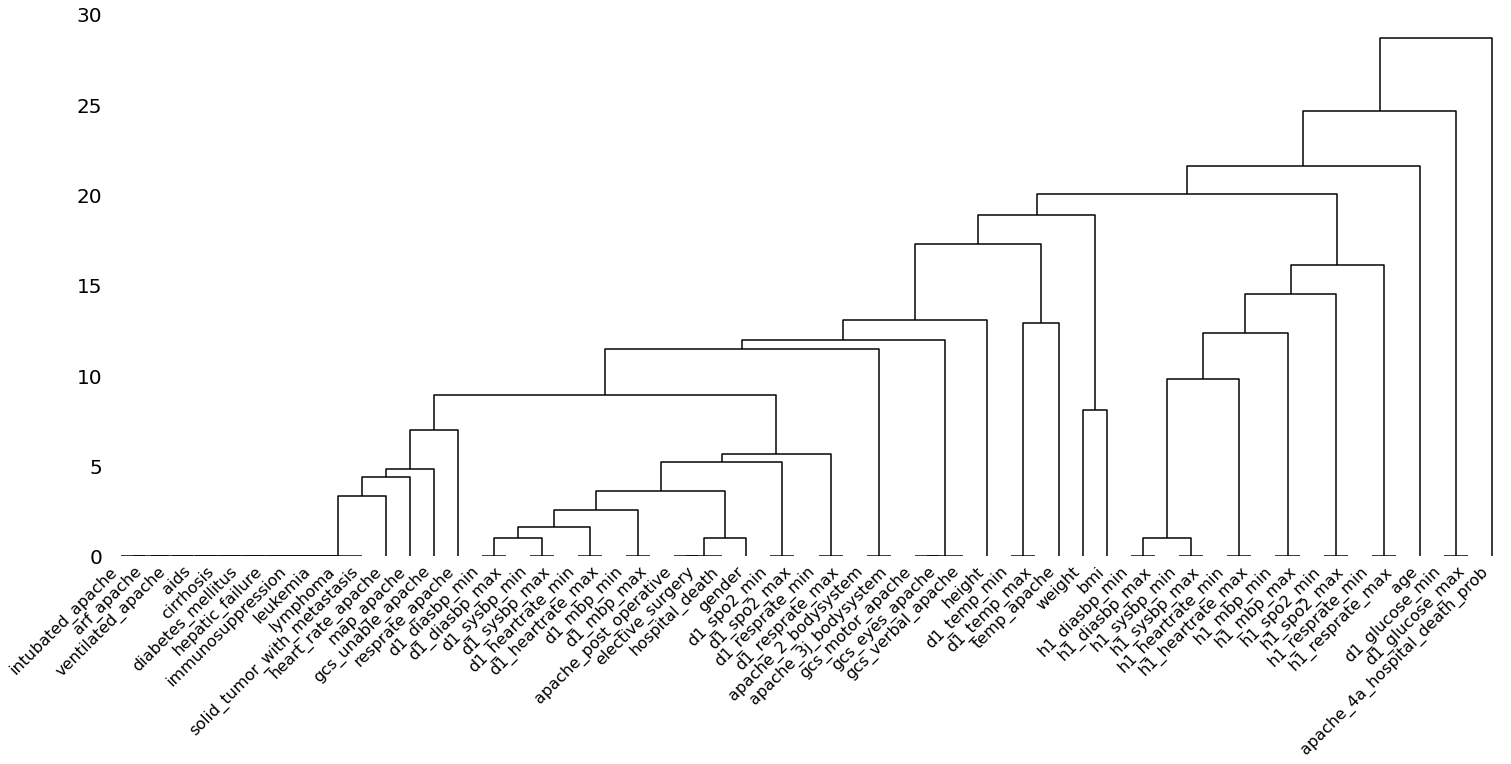

In [16]:
#문제 8
import missingno as msno

msno.dendrogram(train, orientation='top' ,method='average')

'''
intubated_apache, afr_apache, ventilated_apache, aids, cirrhosis,
diabetes_mellitus, hepatic_failure, immunosuppression, leukemia,
lymphoma, solid_tumor_with_metastasis가 비슷한 결측치 발생 경향을 보인다
'''

In [17]:
#문제 9
train.dropna(subset = ['age', 'bmi'], inplace=True)
test.dropna(subset = ['age', 'bmi'], inplace=True)

In [18]:
#문제 10
#범주형: elective_surgery, gender, apache_post_operative
#arf_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache
#gcs_verbal_apache, intubated_apache, ventilated_apche, aids, cirrhosis
#diabetes_mellitus, hepatic_failure, immunosuppression, leukemia
#lymphoma, solid_tumor_with_metastasis, apache_3j_bodysystem,
#apache_2_bodysystem, hospital_death

categorical = ['elective_surgery', 'gender', 'apache_post_operative',
               'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
               'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis',
               'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia',
               'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
               'apache_2_bodysystem', 'hospital_death'] #범주형 변수 목록

numerical = train.columns.tolist()
for c in categorical:
    if c in numerical:
        numerical.remove(c)
        
numerical #수치형 변수 목록

['age',
 'bmi',
 'height',
 'weight',
 'heart_rate_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'apache_4a_hospital_death_prob']

In [19]:
allc = train.columns.tolist()

for c in categorical:
    if c in allc:
        train[c] = train[c].astype('category')
        test[c] = test[c].astype('category')

for c in numerical:
    if c in allc:
        train[c] = train[c].astype('float')
        test[c] = test[c].astype('float')
        
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 8399
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            7697 non-null   float64 
 1   bmi                            7697 non-null   float64 
 2   elective_surgery               7697 non-null   category
 3   gender                         7696 non-null   category
 4   height                         7697 non-null   float64 
 5   weight                         7697 non-null   float64 
 6   apache_post_operative          7697 non-null   category
 7   arf_apache                     7697 non-null   category
 8   gcs_eyes_apache                7599 non-null   category
 9   gcs_motor_apache               7599 non-null   category
 10  gcs_unable_apache              7679 non-null   category
 11  gcs_verbal_apache              7599 non-null   category
 12  heart_rate_apache              769

In [20]:
#문제 11
for c in categorical:
    train.loc[train[c] != train[c], c] = train[c].mode()[0]

for c in numerical:
    train.loc[train[c] != train[c], c] = train[c].median()

In [21]:
#문제 12
train.isnull().sum()

age                              0
bmi                              0
elective_surgery                 0
gender                           0
height                           0
weight                           0
apache_post_operative            0
arf_apache                       0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_mbp_max                       0
d1_mbp_min                       0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max                      0
d1_spo2_min                      0
d1_sysbp_max        

In [22]:
#문제 13
for c in categorical:
    test.loc[test[c] != test[c], c] = train[c].mode()[0]

for c in numerical:
    test.loc[test[c] != test[c], c] = train[c].median()
    
test.isnull().sum()

age                              0
bmi                              0
elective_surgery                 0
gender                           0
height                           0
weight                           0
apache_post_operative            0
arf_apache                       0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_heartrate_max                 0
d1_heartrate_min                 0
d1_mbp_max                       0
d1_mbp_min                       0
d1_resprate_max                  0
d1_resprate_min                  0
d1_spo2_max                      0
d1_spo2_min                      0
d1_sysbp_max        

# CH2

In [23]:
###train 원핫인코딩하기###
'''
파이썬은 r이랑 달리 factor가 없어서
랜덤포레스트에서부터 원핫인코딩 해줘야 함 by 딥팀장님
'''
incd = categorical
incd.remove('hospital_death')

train2 = pd.get_dummies(data=train, columns=incd)
train2.columns.tolist()

['age',
 'bmi',
 'height',
 'weight',
 'heart_rate_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'apache_4a_hospital_death_prob',
 'hospital_death',
 'elective_surgery_0',
 'elective_surgery_1',
 'gender_F',
 'gender_M',
 'apache_post_operative_0',
 'apache_post_operative_1',
 'arf_apache_0.0',
 'arf_apache_1.0',
 'gcs_eyes_apache_1.0',
 'gcs_eyes_apache_2.0',
 'gcs_eyes_apache_3.0',
 'gcs_eyes_apache_4.0',
 'gcs_motor_apache_1.0',
 'gcs_motor_apache_2.0',
 'gcs_motor_apache_3.0',
 

In [24]:
#문제 1
np.random.seed(2930)

from sklearn.model_selection import train_test_split
tr, val = train_test_split(train2, test_size=0.3)

len(tr), len(val), len(train2)

(5387, 2310, 7697)

In [25]:
#문제 2
print('''
n_estimators: 결정 트리 개수, default=10
min_samples_split: 노드 분할에 필요한 최소 데이터 개수, default=2
min_samples_leaf: 리프 노드의 최소 데이터 개수
max_features: 분할을 위해 고려할 최대 feature 개수, default=auto, 개수는 int로 지정, 비중은 float로 지정
max_depth: 트리의 최대 깊이, default=None
max_leaf_nodes: 리프 노드의 최대 개수
''')


n_estimators: 결정 트리 개수, default=10
min_samples_split: 노드 분할에 필요한 최소 데이터 개수, default=2
min_samples_leaf: 리프 노드의 최소 데이터 개수
max_features: 분할을 위해 고려할 최대 feature 개수, default=auto, 개수는 int로 지정, 비중은 float로 지정
max_depth: 트리의 최대 깊이, default=None
max_leaf_nodes: 리프 노드의 최대 개수



In [26]:
#문제 3
from numpy import nan as NA

params = pd.DataFrame({'mtry':[6,8,10,12,6,8,10,12,6,8,10,12],
                  'ntree':[300,300,300,300,400,400,400,400,500,500,500,500],
                  'f1_score':[NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA]})
params

,mtry,ntree,f1_score
0,6,300,NaN
1,8,300,NaN
2,10,300,NaN
3,12,300,NaN
4,6,400,NaN
5,8,400,NaN
6,10,400,NaN
7,12,400,NaN
8,6,500,NaN
9,8,500,NaN


In [27]:
#문제 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer
import warnings
warnings.filterwarnings('ignore')

In [28]:
#문제 5
Y = tr['hospital_death']
X = tr.loc[:, tr.columns != 'hospital_death']

valY = val['hospital_death']
valX = val.loc[:, val.columns != 'hospital_death']

In [29]:
#mtry: max features, ntree: n_estimators

cnt=0
for m,n in zip(params['mtry'], params['ntree']):
    print('max_features:', m, ', n_estimators:', n)
    rf_clf = RandomForestClassifier(n_estimators = n,
                                    max_features = m,
                                   random_state = 0)
    rf_clf.fit(X, Y)
    Y_pred = rf_clf.predict(valX)
    f1 = f1_score(valY, Y_pred)
    params['f1_score'][cnt] = f1
    cnt += 1
    
params

max_features: 6 , n_estimators: 300
max_features: 8 , n_estimators: 300
max_features: 10 , n_estimators: 300
max_features: 12 , n_estimators: 300
max_features: 6 , n_estimators: 400
max_features: 8 , n_estimators: 400
max_features: 10 , n_estimators: 400
max_features: 12 , n_estimators: 400
max_features: 6 , n_estimators: 500
max_features: 8 , n_estimators: 500
max_features: 10 , n_estimators: 500
max_features: 12 , n_estimators: 500


,mtry,ntree,f1_score
0,6,300,0.209524
1,8,300,0.224299
2,10,300,0.246575
3,12,300,0.260090
4,6,400,0.219048
5,8,400,0.242991
6,10,400,0.240741
7,12,400,0.243243
8,6,500,0.235849
9,8,500,0.232558


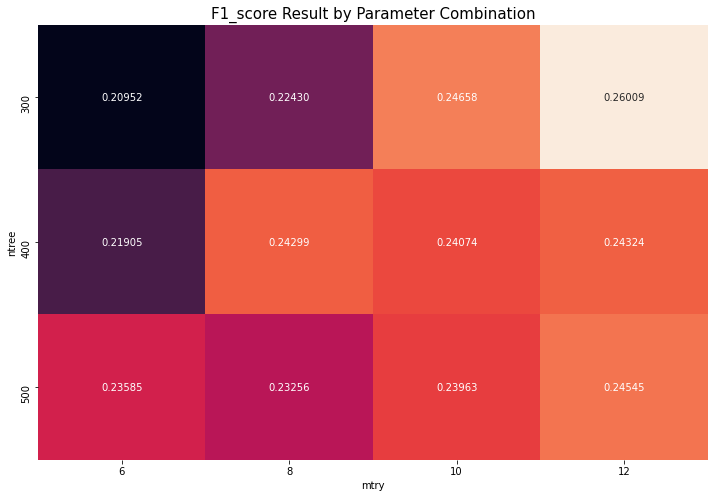

In [30]:
#문제 6
hm_params = params.pivot('ntree', 'mtry', 'f1_score')

fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(hm_params, # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            fmt = '.5f', # 소수점 포맷팅 형태
            cbar = False)

plt.title('F1_score Result by Parameter Combination', size = 15)
plt.ylabel('ntree')
plt.xlabel('mtry') 

plt.show()

In [31]:
#문제 7
rf_clf_best = RandomForestClassifier(n_estimators = 300,
                                max_features = 12)
rf_clf_best.fit(X, Y)

Y_pred = rf_clf_best.predict(valX)
f1 = f1_score(valY, Y_pred)
acc = accuracy_score(valY, Y_pred)

print ('F1 score (val):', f1)
print('Accuracy (val):', acc)

F1 score (val): 0.2780269058295964
Accuracy (val): 0.9303030303030303


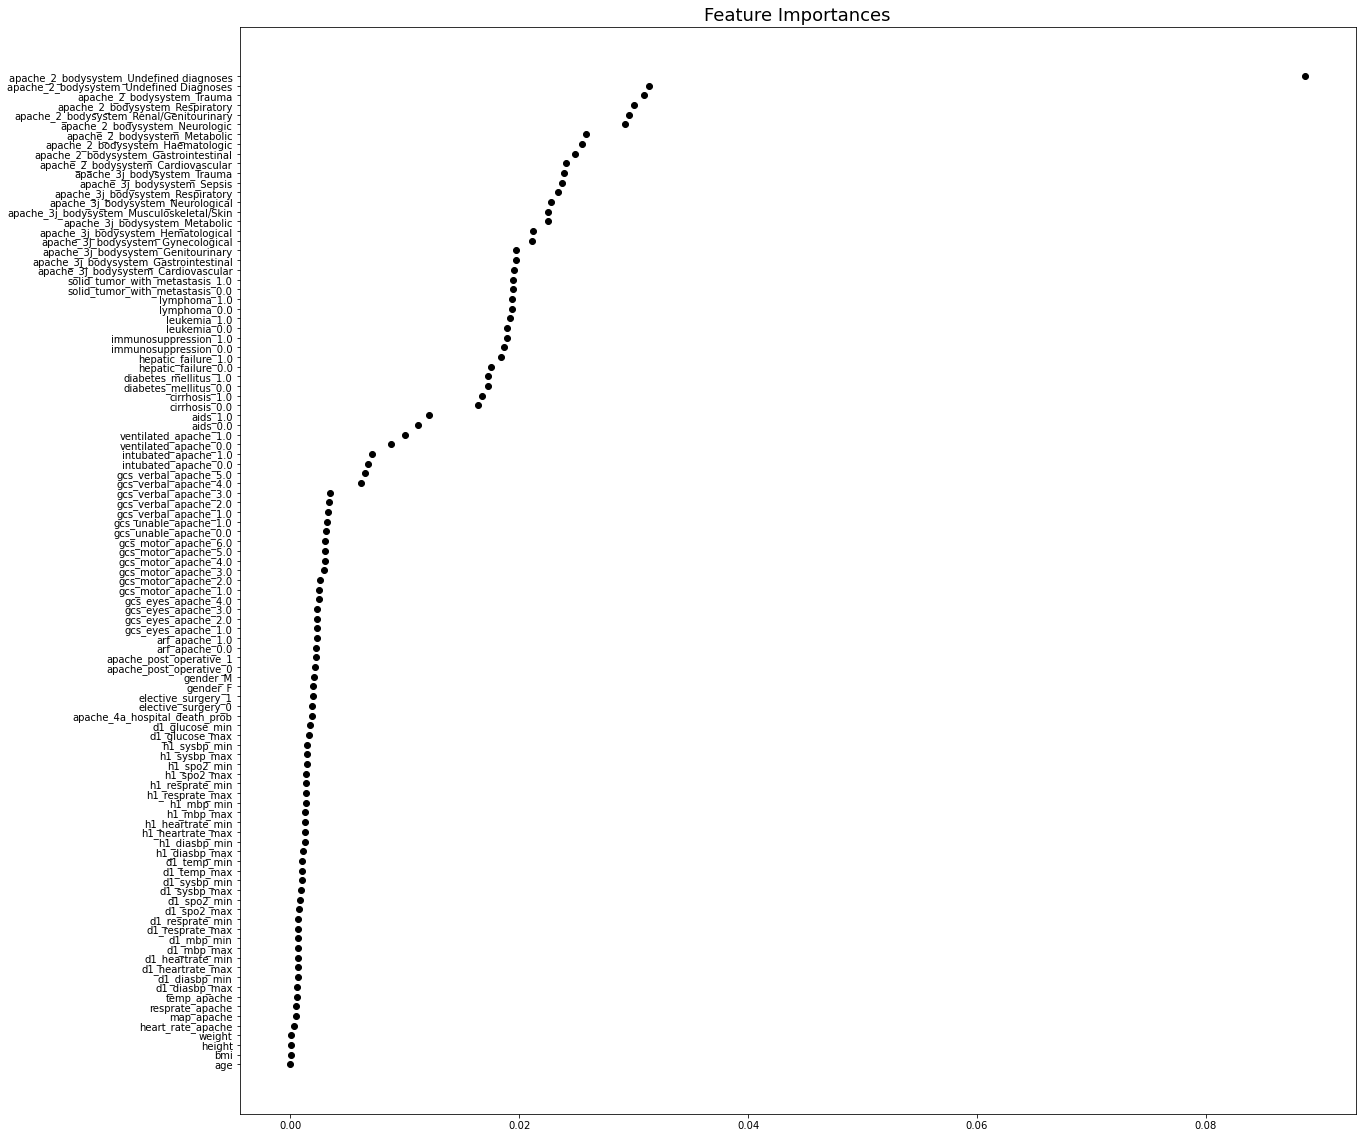

'\n(범주형 변수 원핫인코딩해서 피쳐 개수가 좀 많아보여요...)\napache_2_bodysystem, apache_3j_bodysystem 변수가 상대적으로 영향력이 커 보인다.\n'

In [32]:
#문제 8
feature = tr.loc[:, tr.columns != 'hospital_death'].columns.tolist()
importances = rf_clf_best.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances', fontsize=18)
plt.scatter(importances[indices], feature, c='black')
plt.show()

'''
(범주형 변수 원핫인코딩해서 피쳐 개수가 좀 많아보여요...)
apache_2_bodysystem, apache_3j_bodysystem 변수가 상대적으로 영향력이 커 보인다.
'''

# CH3

In [33]:
#문제 2
#chapter2 처음에 이미 원핫인코딩 했습니다!! (train2)
train3 = train2

test3 = pd.get_dummies(data=test, columns=incd)
len(test3.columns.tolist())

104

In [34]:
#문제 3
print('''
max_depth: 트리의 최대 깊이
min_child_weight: child에서 필요한 모든 관측치에 대한 가중치의 최소합
subsample: 트리마다 데이터 샘플링 비율 (일반적으로 0.5~1)
colsample_bytree: 트리마다 feature 샘플링 비율 (일반적으로 0.5~1)
''')


max_depth: 트리의 최대 깊이
min_child_weight: child에서 필요한 모든 관측치에 대한 가중치의 최소합
subsample: 트리마다 데이터 샘플링 비율 (일반적으로 0.5~1)
colsample_bytree: 트리마다 feature 샘플링 비율 (일반적으로 0.5~1)



In [35]:
#문제 4
import random
np.random.seed(1003)
iterations = [1,2,3,4,5,6,7,8,9,10]

max_depth = []
for _ in range(10):
    num = random.randrange(4,11)
    max_depth.append(num)

min_child_weight = []
for _ in range(10):
    num = random.randrange(4,11)
    min_child_weight.append(num)

subsample = []
for _ in range(10):
    num = random.uniform(0.5, 1)
    subsample.append(round(num, 7))

colsample_bytree = []
for _ in range(10):
    num = random.uniform(0.5, 1)
    colsample_bytree.append(round(num, 7))

    
hparams = pd.DataFrame({'iterations' : iterations,
                       'max_depth' : max_depth,
                       'min_child_weight' : min_child_weight,
                       'subsample' : subsample,
                       'colsample_bytree' : colsample_bytree,
                       'f1_score' : [NA,NA,NA,NA,NA,NA,NA,NA,NA,NA]})

hparams

,iterations,max_depth,min_child_weight,subsample,colsample_bytree,f1_score
0,1,6,8,0.965039,0.891700,NaN
1,2,7,7,0.614168,0.815739,NaN
2,3,10,4,0.705682,0.943125,NaN
3,4,8,4,0.741397,0.795096,NaN
4,5,5,7,0.791143,0.982999,NaN
5,6,6,7,0.605411,0.979566,NaN
6,7,7,6,0.951311,0.832574,NaN
7,8,5,10,0.795625,0.634830,NaN
8,9,8,8,0.543631,0.786108,NaN
9,10,10,9,0.651174,0.947486,NaN


In [36]:
#문제 5
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [37]:
#문제 7
X_train = train3.loc[:, train3.columns != 'hospital_death']
y_train = train3['hospital_death']

X_test = test3.loc[:, train3.columns != 'hospital_death']
y_test = test3['hospital_death']

len(y_train), len(y_test)

(7697, 3323)

In [38]:
warnings.filterwarnings('ignore')
kfold5 = KFold(n_splits=5, shuffle=True, random_state=1003)

cnt=0
for md, mcw, ss, cs in zip(hparams['max_depth'], hparams['min_child_weight'], hparams['subsample'], hparams['colsample_bytree']):
    
    xgb_clf = XGBClassifier(colsample_bytree = cs, 
                            max_depth = md, 
                            min_child_weight = mcw,
                            subsample = ss,
                            eta=0.01,
                            nrounds=1000,
                            random_state=1003,
                            seed = 2930)
    
    f1sc = [] # val set 별 f1 score 임시 저장할 리스트
    
    for train_idx, val_idx in kfold5.split(train3):
        x_t = X_train.iloc[train_idx]
        y_t = y_train.iloc[train_idx]
        x_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]
        
        xgb_clf.fit(x_t, y_t, eval_set=[(x_val, y_val)],
                    early_stopping_rounds=50)
        
        y_pred = xgb_clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1sc.append(f1)
    
    hparams['f1_score'][cnt] = np.mean(f1sc)
    cnt += 1
    
hparams

[18:22:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.68568
[1]	validation_0-logloss:0.67825
[2]	validation_0-logloss:0.67092
[3]	validation_0-logloss:0.66385
[4]	validation_0-logloss:0.65688
[5]	validation_0-logloss:0.64996
[6]	validation_0-logloss:0.64317
[7]	validation_0-logloss:0.63657
[8]	validation_0-logloss:0.63006
[9]	validation_0-logloss:0.62369
[10]	validation_0-logloss:0.61741
[11]	validation_0-logloss:0.61135
[12]	validation_0-logloss:0.60534
[13]	validation_0-logloss:0.59938
[14]	validation_0-logloss:0.59353
[15]	validation_0-logloss:0.58774
[16]	validation_0-logloss:0.58213
[17]	validation_

[5]	validation_0-logloss:0.64940
[6]	validation_0-logloss:0.64257
[7]	validation_0-logloss:0.63593
[8]	validation_0-logloss:0.62935
[9]	validation_0-logloss:0.62296
[10]	validation_0-logloss:0.61667
[11]	validation_0-logloss:0.61043
[12]	validation_0-logloss:0.60436
[13]	validation_0-logloss:0.59835
[14]	validation_0-logloss:0.59247
[15]	validation_0-logloss:0.58666
[16]	validation_0-logloss:0.58103
[17]	validation_0-logloss:0.57543
[18]	validation_0-logloss:0.56996
[19]	validation_0-logloss:0.56453
[20]	validation_0-logloss:0.55918
[21]	validation_0-logloss:0.55397
[22]	validation_0-logloss:0.54888
[23]	validation_0-logloss:0.54383
[24]	validation_0-logloss:0.53887
[25]	validation_0-logloss:0.53400
[26]	validation_0-logloss:0.52915
[27]	validation_0-logloss:0.52441
[28]	validation_0-logloss:0.51980
[29]	validation_0-logloss:0.51521
[30]	validation_0-logloss:0.51070
[31]	validation_0-logloss:0.50627
[32]	validation_0-logloss:0.50191
[33]	validation_0-logloss:0.49759
[34]	validation_0-l

[23]	validation_0-logloss:0.54404
[24]	validation_0-logloss:0.53909
[25]	validation_0-logloss:0.53421
[26]	validation_0-logloss:0.52942
[27]	validation_0-logloss:0.52465
[28]	validation_0-logloss:0.52002
[29]	validation_0-logloss:0.51543
[30]	validation_0-logloss:0.51097
[31]	validation_0-logloss:0.50657
[32]	validation_0-logloss:0.50222
[33]	validation_0-logloss:0.49793
[34]	validation_0-logloss:0.49371
[35]	validation_0-logloss:0.48960
[36]	validation_0-logloss:0.48552
[37]	validation_0-logloss:0.48157
[38]	validation_0-logloss:0.47763
[39]	validation_0-logloss:0.47386
[40]	validation_0-logloss:0.47002
[41]	validation_0-logloss:0.46627
[42]	validation_0-logloss:0.46252
[43]	validation_0-logloss:0.45887
[44]	validation_0-logloss:0.45528
[45]	validation_0-logloss:0.45169
[46]	validation_0-logloss:0.44821
[47]	validation_0-logloss:0.44481
[48]	validation_0-logloss:0.44139
[49]	validation_0-logloss:0.43812
[50]	validation_0-logloss:0.43484
[51]	validation_0-logloss:0.43158
[52]	validatio

[41]	validation_0-logloss:0.47435
[42]	validation_0-logloss:0.47079
[43]	validation_0-logloss:0.46727
[44]	validation_0-logloss:0.46385
[45]	validation_0-logloss:0.46048
[46]	validation_0-logloss:0.45706
[47]	validation_0-logloss:0.45378
[48]	validation_0-logloss:0.45050
[49]	validation_0-logloss:0.44733
[50]	validation_0-logloss:0.44415
[51]	validation_0-logloss:0.44120
[52]	validation_0-logloss:0.43814
[53]	validation_0-logloss:0.43513
[54]	validation_0-logloss:0.43230
[55]	validation_0-logloss:0.42934
[56]	validation_0-logloss:0.42640
[57]	validation_0-logloss:0.42360
[58]	validation_0-logloss:0.42074
[59]	validation_0-logloss:0.41794
[60]	validation_0-logloss:0.41530
[61]	validation_0-logloss:0.41261
[62]	validation_0-logloss:0.40996
[63]	validation_0-logloss:0.40730
[64]	validation_0-logloss:0.40476
[65]	validation_0-logloss:0.40224
[66]	validation_0-logloss:0.39970
[67]	validation_0-logloss:0.39738
[68]	validation_0-logloss:0.39494
[69]	validation_0-logloss:0.39262
[70]	validatio

[59]	validation_0-logloss:0.41471
[60]	validation_0-logloss:0.41210
[61]	validation_0-logloss:0.40942
[62]	validation_0-logloss:0.40669
[63]	validation_0-logloss:0.40405
[64]	validation_0-logloss:0.40148
[65]	validation_0-logloss:0.39893
[66]	validation_0-logloss:0.39652
[67]	validation_0-logloss:0.39399
[68]	validation_0-logloss:0.39146
[69]	validation_0-logloss:0.38904
[70]	validation_0-logloss:0.38662
[71]	validation_0-logloss:0.38436
[72]	validation_0-logloss:0.38202
[73]	validation_0-logloss:0.37968
[74]	validation_0-logloss:0.37746
[75]	validation_0-logloss:0.37522
[76]	validation_0-logloss:0.37311
[77]	validation_0-logloss:0.37092
[78]	validation_0-logloss:0.36873
[79]	validation_0-logloss:0.36659
[80]	validation_0-logloss:0.36454
[81]	validation_0-logloss:0.36251
[82]	validation_0-logloss:0.36054
[83]	validation_0-logloss:0.35859
[84]	validation_0-logloss:0.35663
[85]	validation_0-logloss:0.35466
[86]	validation_0-logloss:0.35276
[87]	validation_0-logloss:0.35086
[88]	validatio

[77]	validation_0-logloss:0.36651
[78]	validation_0-logloss:0.36433
[79]	validation_0-logloss:0.36226
[80]	validation_0-logloss:0.36013
[81]	validation_0-logloss:0.35804
[82]	validation_0-logloss:0.35599
[83]	validation_0-logloss:0.35394
[84]	validation_0-logloss:0.35202
[85]	validation_0-logloss:0.35006
[86]	validation_0-logloss:0.34805
[87]	validation_0-logloss:0.34608
[88]	validation_0-logloss:0.34421
[89]	validation_0-logloss:0.34231
[90]	validation_0-logloss:0.34057
[91]	validation_0-logloss:0.33874
[92]	validation_0-logloss:0.33687
[93]	validation_0-logloss:0.33506
[94]	validation_0-logloss:0.33335
[95]	validation_0-logloss:0.33152
[96]	validation_0-logloss:0.32985
[97]	validation_0-logloss:0.32823
[98]	validation_0-logloss:0.32652
[99]	validation_0-logloss:0.32481
[18:22:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by la

[95]	validation_0-logloss:0.32454
[96]	validation_0-logloss:0.32284
[97]	validation_0-logloss:0.32119
[98]	validation_0-logloss:0.31947
[99]	validation_0-logloss:0.31778
[18:22:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.68589
[1]	validation_0-logloss:0.67853
[2]	validation_0-logloss:0.67117
[3]	validation_0-logloss:0.66410
[4]	validation_0-logloss:0.65714
[5]	validation_0-logloss:0.65038
[6]	validation_0-logloss:0.64376
[7]	validation_0-logloss:0.63719
[8]	validation_0-logloss:0.63085
[9]	validation_0-logloss:0.62451
[10]	validation_0-logloss:0.61837
[11]	validation_0-logloss:0.61235
[12]	validation_

[0]	validation_0-logloss:0.68569
[1]	validation_0-logloss:0.67826
[2]	validation_0-logloss:0.67097
[3]	validation_0-logloss:0.66389
[4]	validation_0-logloss:0.65695
[5]	validation_0-logloss:0.65017
[6]	validation_0-logloss:0.64356
[7]	validation_0-logloss:0.63688
[8]	validation_0-logloss:0.63042
[9]	validation_0-logloss:0.62414
[10]	validation_0-logloss:0.61798
[11]	validation_0-logloss:0.61194
[12]	validation_0-logloss:0.60599
[13]	validation_0-logloss:0.60004
[14]	validation_0-logloss:0.59409
[15]	validation_0-logloss:0.58837
[16]	validation_0-logloss:0.58273
[17]	validation_0-logloss:0.57727
[18]	validation_0-logloss:0.57186
[19]	validation_0-logloss:0.56645
[20]	validation_0-logloss:0.56121
[21]	validation_0-logloss:0.55612
[22]	validation_0-logloss:0.55107
[23]	validation_0-logloss:0.54613
[24]	validation_0-logloss:0.54120
[25]	validation_0-logloss:0.53635
[26]	validation_0-logloss:0.53160
[27]	validation_0-logloss:0.52701
[28]	validation_0-logloss:0.52239
[29]	validation_0-loglos

[17]	validation_0-logloss:0.57541
[18]	validation_0-logloss:0.56985
[19]	validation_0-logloss:0.56433
[20]	validation_0-logloss:0.55906
[21]	validation_0-logloss:0.55389
[22]	validation_0-logloss:0.54885
[23]	validation_0-logloss:0.54377
[24]	validation_0-logloss:0.53885
[25]	validation_0-logloss:0.53396
[26]	validation_0-logloss:0.52918
[27]	validation_0-logloss:0.52443
[28]	validation_0-logloss:0.51977
[29]	validation_0-logloss:0.51523
[30]	validation_0-logloss:0.51067
[31]	validation_0-logloss:0.50631
[32]	validation_0-logloss:0.50192
[33]	validation_0-logloss:0.49750
[34]	validation_0-logloss:0.49331
[35]	validation_0-logloss:0.48912
[36]	validation_0-logloss:0.48503
[37]	validation_0-logloss:0.48104
[38]	validation_0-logloss:0.47707
[39]	validation_0-logloss:0.47318
[40]	validation_0-logloss:0.46929
[41]	validation_0-logloss:0.46556
[42]	validation_0-logloss:0.46185
[43]	validation_0-logloss:0.45811
[44]	validation_0-logloss:0.45449
[45]	validation_0-logloss:0.45091
[46]	validatio

[35]	validation_0-logloss:0.48994
[36]	validation_0-logloss:0.48584
[37]	validation_0-logloss:0.48183
[38]	validation_0-logloss:0.47779
[39]	validation_0-logloss:0.47395
[40]	validation_0-logloss:0.47002
[41]	validation_0-logloss:0.46619
[42]	validation_0-logloss:0.46243
[43]	validation_0-logloss:0.45877
[44]	validation_0-logloss:0.45515
[45]	validation_0-logloss:0.45160
[46]	validation_0-logloss:0.44815
[47]	validation_0-logloss:0.44473
[48]	validation_0-logloss:0.44137
[49]	validation_0-logloss:0.43808
[50]	validation_0-logloss:0.43478
[51]	validation_0-logloss:0.43157
[52]	validation_0-logloss:0.42836
[53]	validation_0-logloss:0.42531
[54]	validation_0-logloss:0.42220
[55]	validation_0-logloss:0.41920
[56]	validation_0-logloss:0.41624
[57]	validation_0-logloss:0.41336
[58]	validation_0-logloss:0.41051
[59]	validation_0-logloss:0.40764
[60]	validation_0-logloss:0.40497
[61]	validation_0-logloss:0.40221
[62]	validation_0-logloss:0.39946
[63]	validation_0-logloss:0.39674
[64]	validatio

[53]	validation_0-logloss:0.43382
[54]	validation_0-logloss:0.43092
[55]	validation_0-logloss:0.42800
[56]	validation_0-logloss:0.42507
[57]	validation_0-logloss:0.42222
[58]	validation_0-logloss:0.41938
[59]	validation_0-logloss:0.41666
[60]	validation_0-logloss:0.41388
[61]	validation_0-logloss:0.41120
[62]	validation_0-logloss:0.40853
[63]	validation_0-logloss:0.40594
[64]	validation_0-logloss:0.40344
[65]	validation_0-logloss:0.40094
[66]	validation_0-logloss:0.39848
[67]	validation_0-logloss:0.39614
[68]	validation_0-logloss:0.39373
[69]	validation_0-logloss:0.39131
[70]	validation_0-logloss:0.38894
[71]	validation_0-logloss:0.38661
[72]	validation_0-logloss:0.38431
[73]	validation_0-logloss:0.38205
[74]	validation_0-logloss:0.37982
[75]	validation_0-logloss:0.37765
[76]	validation_0-logloss:0.37552
[77]	validation_0-logloss:0.37344
[78]	validation_0-logloss:0.37136
[79]	validation_0-logloss:0.36926
[80]	validation_0-logloss:0.36719
[81]	validation_0-logloss:0.36523
[82]	validatio

[71]	validation_0-logloss:0.38282
[72]	validation_0-logloss:0.38051
[73]	validation_0-logloss:0.37821
[74]	validation_0-logloss:0.37600
[75]	validation_0-logloss:0.37374
[76]	validation_0-logloss:0.37154
[77]	validation_0-logloss:0.36937
[78]	validation_0-logloss:0.36721
[79]	validation_0-logloss:0.36508
[80]	validation_0-logloss:0.36296
[81]	validation_0-logloss:0.36093
[82]	validation_0-logloss:0.35893
[83]	validation_0-logloss:0.35702
[84]	validation_0-logloss:0.35506
[85]	validation_0-logloss:0.35310
[86]	validation_0-logloss:0.35118
[87]	validation_0-logloss:0.34930
[88]	validation_0-logloss:0.34747
[89]	validation_0-logloss:0.34561
[90]	validation_0-logloss:0.34383
[91]	validation_0-logloss:0.34206
[92]	validation_0-logloss:0.34025
[93]	validation_0-logloss:0.33853
[94]	validation_0-logloss:0.33679
[95]	validation_0-logloss:0.33508
[96]	validation_0-logloss:0.33337
[97]	validation_0-logloss:0.33169
[98]	validation_0-logloss:0.33006
[99]	validation_0-logloss:0.32853
[18:23:10] WAR

[89]	validation_0-logloss:0.34309
[90]	validation_0-logloss:0.34123
[91]	validation_0-logloss:0.33942
[92]	validation_0-logloss:0.33765
[93]	validation_0-logloss:0.33594
[94]	validation_0-logloss:0.33427
[95]	validation_0-logloss:0.33256
[96]	validation_0-logloss:0.33092
[97]	validation_0-logloss:0.32931
[98]	validation_0-logloss:0.32769
[99]	validation_0-logloss:0.32613
[18:23:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.68574
[1]	validation_0-logloss:0.67846
[2]	validation_0-logloss:0.67132
[3]	validation_0-logloss:0.66432
[4]	validation_0-logloss:0.65749
[5]	validation_0-logloss:0.65078
[6]	validati

[0]	validation_0-logloss:0.68573
[1]	validation_0-logloss:0.67843
[2]	validation_0-logloss:0.67117
[3]	validation_0-logloss:0.66420
[4]	validation_0-logloss:0.65729
[5]	validation_0-logloss:0.65049
[6]	validation_0-logloss:0.64381
[7]	validation_0-logloss:0.63721
[8]	validation_0-logloss:0.63077
[9]	validation_0-logloss:0.62442
[10]	validation_0-logloss:0.61824
[11]	validation_0-logloss:0.61218
[12]	validation_0-logloss:0.60620
[13]	validation_0-logloss:0.60034
[14]	validation_0-logloss:0.59453
[15]	validation_0-logloss:0.58887
[16]	validation_0-logloss:0.58357
[17]	validation_0-logloss:0.57817
[18]	validation_0-logloss:0.57287
[19]	validation_0-logloss:0.56772
[20]	validation_0-logloss:0.56254
[21]	validation_0-logloss:0.55743
[22]	validation_0-logloss:0.55239
[23]	validation_0-logloss:0.54745
[24]	validation_0-logloss:0.54261
[25]	validation_0-logloss:0.53784
[26]	validation_0-logloss:0.53320
[27]	validation_0-logloss:0.52864
[28]	validation_0-logloss:0.52412
[29]	validation_0-loglos

[18]	validation_0-logloss:0.57133
[19]	validation_0-logloss:0.56594
[20]	validation_0-logloss:0.56068
[21]	validation_0-logloss:0.55562
[22]	validation_0-logloss:0.55049
[23]	validation_0-logloss:0.54560
[24]	validation_0-logloss:0.54066
[25]	validation_0-logloss:0.53582
[26]	validation_0-logloss:0.53104
[27]	validation_0-logloss:0.52643
[28]	validation_0-logloss:0.52181
[29]	validation_0-logloss:0.51730
[30]	validation_0-logloss:0.51284
[31]	validation_0-logloss:0.50850
[32]	validation_0-logloss:0.50423
[33]	validation_0-logloss:0.49996
[34]	validation_0-logloss:0.49577
[35]	validation_0-logloss:0.49161
[36]	validation_0-logloss:0.48758
[37]	validation_0-logloss:0.48364
[38]	validation_0-logloss:0.47971
[39]	validation_0-logloss:0.47594
[40]	validation_0-logloss:0.47217
[41]	validation_0-logloss:0.46841
[42]	validation_0-logloss:0.46474
[43]	validation_0-logloss:0.46107
[44]	validation_0-logloss:0.45756
[45]	validation_0-logloss:0.45410
[46]	validation_0-logloss:0.45063
[47]	validatio

[36]	validation_0-logloss:0.48528
[37]	validation_0-logloss:0.48123
[38]	validation_0-logloss:0.47726
[39]	validation_0-logloss:0.47335
[40]	validation_0-logloss:0.46946
[41]	validation_0-logloss:0.46570
[42]	validation_0-logloss:0.46198
[43]	validation_0-logloss:0.45834
[44]	validation_0-logloss:0.45475
[45]	validation_0-logloss:0.45115
[46]	validation_0-logloss:0.44760
[47]	validation_0-logloss:0.44409
[48]	validation_0-logloss:0.44067
[49]	validation_0-logloss:0.43735
[50]	validation_0-logloss:0.43405
[51]	validation_0-logloss:0.43078
[52]	validation_0-logloss:0.42754
[53]	validation_0-logloss:0.42441
[54]	validation_0-logloss:0.42130
[55]	validation_0-logloss:0.41826
[56]	validation_0-logloss:0.41522
[57]	validation_0-logloss:0.41225
[58]	validation_0-logloss:0.40936
[59]	validation_0-logloss:0.40646
[60]	validation_0-logloss:0.40358
[61]	validation_0-logloss:0.40076
[62]	validation_0-logloss:0.39801
[63]	validation_0-logloss:0.39524
[64]	validation_0-logloss:0.39254
[65]	validatio

[54]	validation_0-logloss:0.42222
[55]	validation_0-logloss:0.41911
[56]	validation_0-logloss:0.41615
[57]	validation_0-logloss:0.41323
[58]	validation_0-logloss:0.41047
[59]	validation_0-logloss:0.40753
[60]	validation_0-logloss:0.40484
[61]	validation_0-logloss:0.40208
[62]	validation_0-logloss:0.39931
[63]	validation_0-logloss:0.39664
[64]	validation_0-logloss:0.39395
[65]	validation_0-logloss:0.39145
[66]	validation_0-logloss:0.38892
[67]	validation_0-logloss:0.38637
[68]	validation_0-logloss:0.38381
[69]	validation_0-logloss:0.38129
[70]	validation_0-logloss:0.37879
[71]	validation_0-logloss:0.37646
[72]	validation_0-logloss:0.37406
[73]	validation_0-logloss:0.37171
[74]	validation_0-logloss:0.36940
[75]	validation_0-logloss:0.36707
[76]	validation_0-logloss:0.36482
[77]	validation_0-logloss:0.36259
[78]	validation_0-logloss:0.36041
[79]	validation_0-logloss:0.35824
[80]	validation_0-logloss:0.35614
[81]	validation_0-logloss:0.35402
[82]	validation_0-logloss:0.35201
[83]	validatio

[71]	validation_0-logloss:0.38847
[72]	validation_0-logloss:0.38623
[73]	validation_0-logloss:0.38393
[74]	validation_0-logloss:0.38169
[75]	validation_0-logloss:0.37948
[76]	validation_0-logloss:0.37734
[77]	validation_0-logloss:0.37518
[78]	validation_0-logloss:0.37307
[79]	validation_0-logloss:0.37110
[80]	validation_0-logloss:0.36902
[81]	validation_0-logloss:0.36703
[82]	validation_0-logloss:0.36509
[83]	validation_0-logloss:0.36318
[84]	validation_0-logloss:0.36133
[85]	validation_0-logloss:0.35939
[86]	validation_0-logloss:0.35751
[87]	validation_0-logloss:0.35566
[88]	validation_0-logloss:0.35378
[89]	validation_0-logloss:0.35196
[90]	validation_0-logloss:0.35027
[91]	validation_0-logloss:0.34862
[92]	validation_0-logloss:0.34696
[93]	validation_0-logloss:0.34527
[94]	validation_0-logloss:0.34363
[95]	validation_0-logloss:0.34196
[96]	validation_0-logloss:0.34030
[97]	validation_0-logloss:0.33862
[98]	validation_0-logloss:0.33702
[99]	validation_0-logloss:0.33542
[18:23:36] WAR

[89]	validation_0-logloss:0.34854
[90]	validation_0-logloss:0.34675
[91]	validation_0-logloss:0.34503
[92]	validation_0-logloss:0.34324
[93]	validation_0-logloss:0.34145
[94]	validation_0-logloss:0.33971
[95]	validation_0-logloss:0.33797
[96]	validation_0-logloss:0.33620
[97]	validation_0-logloss:0.33459
[98]	validation_0-logloss:0.33292
[99]	validation_0-logloss:0.33132
[18:23:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.68576
[1]	validation_0-logloss:0.67823
[2]	validation_0-logloss:0.67087
[3]	validation_0-logloss:0.66384
[4]	validation_0-logloss:0.65673
[5]	validation_0-logloss:0.65005
[6]	validati

[0]	validation_0-logloss:0.68590
[1]	validation_0-logloss:0.67854
[2]	validation_0-logloss:0.67168
[3]	validation_0-logloss:0.66468
[4]	validation_0-logloss:0.65782
[5]	validation_0-logloss:0.65114
[6]	validation_0-logloss:0.64447
[7]	validation_0-logloss:0.63790
[8]	validation_0-logloss:0.63155
[9]	validation_0-logloss:0.62531
[10]	validation_0-logloss:0.61925
[11]	validation_0-logloss:0.61348
[12]	validation_0-logloss:0.60752
[13]	validation_0-logloss:0.60183
[14]	validation_0-logloss:0.59613
[15]	validation_0-logloss:0.59057
[16]	validation_0-logloss:0.58506
[17]	validation_0-logloss:0.57972
[18]	validation_0-logloss:0.57460
[19]	validation_0-logloss:0.56946
[20]	validation_0-logloss:0.56429
[21]	validation_0-logloss:0.55936
[22]	validation_0-logloss:0.55441
[23]	validation_0-logloss:0.54959
[24]	validation_0-logloss:0.54476
[25]	validation_0-logloss:0.54000
[26]	validation_0-logloss:0.53542
[27]	validation_0-logloss:0.53085
[28]	validation_0-logloss:0.52636
[29]	validation_0-loglos

[18]	validation_0-logloss:0.57382
[19]	validation_0-logloss:0.56865
[20]	validation_0-logloss:0.56349
[21]	validation_0-logloss:0.55853
[22]	validation_0-logloss:0.55356
[23]	validation_0-logloss:0.54858
[24]	validation_0-logloss:0.54373
[25]	validation_0-logloss:0.53897
[26]	validation_0-logloss:0.53427
[27]	validation_0-logloss:0.52963
[28]	validation_0-logloss:0.52516
[29]	validation_0-logloss:0.52076
[30]	validation_0-logloss:0.51637
[31]	validation_0-logloss:0.51219
[32]	validation_0-logloss:0.50796
[33]	validation_0-logloss:0.50385
[34]	validation_0-logloss:0.49990
[35]	validation_0-logloss:0.49599
[36]	validation_0-logloss:0.49196
[37]	validation_0-logloss:0.48808
[38]	validation_0-logloss:0.48422
[39]	validation_0-logloss:0.48067
[40]	validation_0-logloss:0.47684
[41]	validation_0-logloss:0.47318
[42]	validation_0-logloss:0.46943
[43]	validation_0-logloss:0.46582
[44]	validation_0-logloss:0.46233
[45]	validation_0-logloss:0.45892
[46]	validation_0-logloss:0.45550
[47]	validatio

[36]	validation_0-logloss:0.48839
[37]	validation_0-logloss:0.48444
[38]	validation_0-logloss:0.48053
[39]	validation_0-logloss:0.47671
[40]	validation_0-logloss:0.47299
[41]	validation_0-logloss:0.46926
[42]	validation_0-logloss:0.46559
[43]	validation_0-logloss:0.46206
[44]	validation_0-logloss:0.45851
[45]	validation_0-logloss:0.45507
[46]	validation_0-logloss:0.45163
[47]	validation_0-logloss:0.44825
[48]	validation_0-logloss:0.44499
[49]	validation_0-logloss:0.44172
[50]	validation_0-logloss:0.43848
[51]	validation_0-logloss:0.43527
[52]	validation_0-logloss:0.43214
[53]	validation_0-logloss:0.42907
[54]	validation_0-logloss:0.42602
[55]	validation_0-logloss:0.42301
[56]	validation_0-logloss:0.42008
[57]	validation_0-logloss:0.41717
[58]	validation_0-logloss:0.41432
[59]	validation_0-logloss:0.41153
[60]	validation_0-logloss:0.40874
[61]	validation_0-logloss:0.40607
[62]	validation_0-logloss:0.40342
[63]	validation_0-logloss:0.40072
[64]	validation_0-logloss:0.39804
[65]	validatio

[53]	validation_0-logloss:0.42431
[54]	validation_0-logloss:0.42122
[55]	validation_0-logloss:0.41813
[56]	validation_0-logloss:0.41518
[57]	validation_0-logloss:0.41222
[58]	validation_0-logloss:0.40935
[59]	validation_0-logloss:0.40638
[60]	validation_0-logloss:0.40359
[61]	validation_0-logloss:0.40072
[62]	validation_0-logloss:0.39804
[63]	validation_0-logloss:0.39521
[64]	validation_0-logloss:0.39251
[65]	validation_0-logloss:0.38986
[66]	validation_0-logloss:0.38726
[67]	validation_0-logloss:0.38470
[68]	validation_0-logloss:0.38217
[69]	validation_0-logloss:0.37969
[70]	validation_0-logloss:0.37720
[71]	validation_0-logloss:0.37469
[72]	validation_0-logloss:0.37228
[73]	validation_0-logloss:0.36993
[74]	validation_0-logloss:0.36761
[75]	validation_0-logloss:0.36530
[76]	validation_0-logloss:0.36305
[77]	validation_0-logloss:0.36080
[78]	validation_0-logloss:0.35858
[79]	validation_0-logloss:0.35639
[80]	validation_0-logloss:0.35430
[81]	validation_0-logloss:0.35215
[82]	validatio

[71]	validation_0-logloss:0.37664
[72]	validation_0-logloss:0.37428
[73]	validation_0-logloss:0.37191
[74]	validation_0-logloss:0.36959
[75]	validation_0-logloss:0.36732
[76]	validation_0-logloss:0.36509
[77]	validation_0-logloss:0.36285
[78]	validation_0-logloss:0.36063
[79]	validation_0-logloss:0.35845
[80]	validation_0-logloss:0.35636
[81]	validation_0-logloss:0.35436
[82]	validation_0-logloss:0.35227
[83]	validation_0-logloss:0.35022
[84]	validation_0-logloss:0.34834
[85]	validation_0-logloss:0.34639
[86]	validation_0-logloss:0.34447
[87]	validation_0-logloss:0.34255
[88]	validation_0-logloss:0.34064
[89]	validation_0-logloss:0.33875
[90]	validation_0-logloss:0.33687
[91]	validation_0-logloss:0.33502
[92]	validation_0-logloss:0.33325
[93]	validation_0-logloss:0.33141
[94]	validation_0-logloss:0.32968
[95]	validation_0-logloss:0.32793
[96]	validation_0-logloss:0.32628
[97]	validation_0-logloss:0.32460
[98]	validation_0-logloss:0.32295
[99]	validation_0-logloss:0.32125


,iterations,max_depth,min_child_weight,subsample,colsample_bytree,f1_score
0,1,6,8,0.965039,0.891700,0.362387
1,2,7,7,0.614168,0.815739,0.359731
2,3,10,4,0.705682,0.943125,0.386314
3,4,8,4,0.741397,0.795096,0.370673
4,5,5,7,0.791143,0.982999,0.369570
5,6,6,7,0.605411,0.979566,0.386554
6,7,7,6,0.951311,0.832574,0.356585
7,8,5,10,0.795625,0.634830,0.305857
8,9,8,8,0.543631,0.786108,0.348966
9,10,10,9,0.651174,0.947486,0.372130


In [39]:
#문제 8
hparams.iloc[5]

iterations          6.000000
max_depth           6.000000
min_child_weight    7.000000
subsample           0.605411
colsample_bytree    0.979566
f1_score            0.386554
Name: 5, dtype: float64

# CH4

In [40]:
Xtr = train3.loc[:, train3.columns != 'hospital_death']
ytr = train3['hospital_death']

Xtest = test3.loc[:, train3.columns != 'hospital_death']
ytest = test3['hospital_death']

In [42]:
#문제 1
rf_clf_best = RandomForestClassifier(n_estimators = 300,
                                max_features = 12)
rf_clf_best.fit(Xtr, ytr)

pred_y = rf_clf_best.predict(Xtest)
f1 = f1_score(ytest, pred_y)
acc = accuracy_score(ytest, pred_y)

print ('Test F1 score of rf_clf_best:', f1)
print('Test Accuracy of rf_clf_best:', acc)

Test F1 score of rf_clf_best: 0.36253776435045315
Test Accuracy of rf_clf_best: 0.9365031597953656


In [44]:
#문제 2
xgb_clf_best = XGBClassifier(colsample_bytree = 0.979566, 
                            max_depth = 6, 
                            min_child_weight = 7,
                            subsample = 0.605411,
                            eta=0.01,
                            nrounds=1000,
                            random_state=1003,
                            seed = 2930)

xgb_clf_best.fit(Xtr, ytr)
        
pred_y = xgb_clf_best.predict(Xtest)
f1 = f1_score(ytest, pred_y)
acc = accuracy_score(ytest, pred_y)

print ('Test F1 score of xgb_clf_best:', f1)
print('Test Accuracy of xgb_clf_best:', acc)

[18:51:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Test F1 score of xgb_clf_best: 0.3684210526315789
Test Accuracy of xgb_clf_best: 0.9349984953355401


In [48]:
#문제 3
print('''
각각 최고 파라미터 조합으로 학습한 결과,
RandomForest는 f1_score: 0.3625, acc: 0.9365
XGBoost는 f1_score: 0.3684, acc: 0.935
으로 두 모델 다 비슷한 성능을 기록했다.

test 데이터의 클래스 비율이 불균형한 점을 고려했을 때,
정확도보다는 f1_score가 더 좋은 평가 지표이므로
XGBoost가 조금 더 좋은 성능을 냈다고 볼 수 있다.
''')


각각 최고 파라미터 조합으로 학습한 결과,
RandomForest는 f1_score: 0.3625, acc: 0.9365
XGBoost는 f1_score: 0.3684, acc: 0.935
으로 두 모델 다 비슷한 성능을 기록했다.

test 데이터의 클래스 비율이 불균형한 점을 고려했을 때,
정확도보다는 f1_score가 더 좋은 평가 지표이므로
XGBoost가 조금 더 좋은 성능을 냈다고 볼 수 있다.



In [46]:
ytest.value_counts()

0    3071
1     252
Name: hospital_death, dtype: int64